In [60]:
import numpy as np
import random
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import minimize_scalar

In [61]:
class Function:
    def __init__(self, function, bounds):
        self.function = function
        self.bounds = bounds
        self.maixmum = self.get_maximum()

    import scipy.optimize
    
    def get_maximum(self):
        return (scipy.optimize.minimize_scalar(lambda x: -1 * self.function(x), bounds=self.bounds, method='bounded').fun * -1)
        # is there a better way to find maximum? 

1. Finish off the method of moments example we started in the lectures. Start from the probability distribution:
\begin{equation*}
f(X ; \alpha, \beta)=N\left(1+\alpha x+\beta x^2\right) \quad \text { for } \quad a \leq x \leq b
\end{equation*}
(a) Show that the normalisation parameter $N$ can be written in the following form:
\begin{equation*}
N=\frac{1}{d_1+\alpha d_2+\beta d_3} \quad \text { where } \quad d_k=\frac{1}{k}\left(b^k-a^k\right)
\end{equation*}
(b) There are two unknowns so let's take the first two central moments. Compute the expectation values of the first and second central moments.
(c) Solve these two equations to express $\alpha$ and $\beta$ in terms of the expectations of the first and second central moments. The method of moments estimates $\hat{\alpha}$ and $\hat{\beta}$ can then be computed by plugging in the sample estimates of the first and second central moments.

In [70]:
alpha = 0.8
beta = 0.8
a = 0
b = 2

d = lambda k: 1/k * (b**k - a**k)
N = 1/(d(1) + alpha * d(2) + beta * d(3))
print (d(2))

fn = Function(lambda x: N*(1+alpha*x + beta*x**2), bounds = [a,b])



50.0


In [63]:
number_of_interation = 100000
data = pd.DataFrame()
xmin = a
xmax = b
xlist = []
count =0 
for i in range (0,number_of_interation):
    x = random.uniform(xmin, xmax)
    y = random.uniform(0, fn.maixmum)
    if fn.function(x) > fn.maixmum:
        print("Error")
    if y <= fn.function(x):
        xlist.append(x)
        count += 1

df = pd.DataFrame(xlist, columns=['x'])

print (count/number_of_interation)
    

0.5387


In [64]:
# data = np.load('mom_data.npy')
# df = pd.DataFrame(data, columns=["x"])

# print (df)

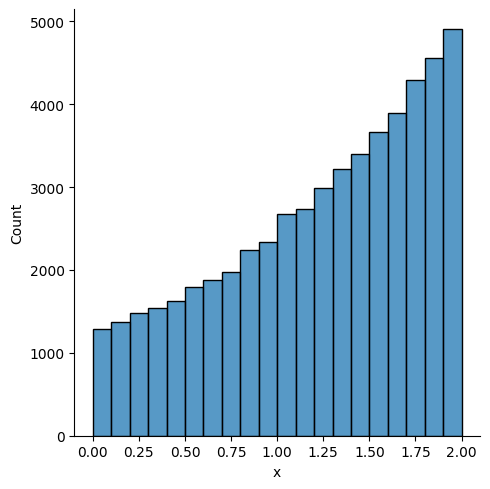

In [65]:
sns.displot(df, x="x", bins=20)
plt.show()

In [66]:
mu = df['x'].mean()
sigma = df['x'].std()
mu2 = sigma**2 + mu**2

In [69]:
matrix1 = np.array([[d(3) - mu * d(2), d(4) - mu*d(3)],
                    [d(4) - mu2 * d(2), d(5) - mu2 * d(3)]])

matrix2 = np.array([mu* d(1) -d(2), mu2 *d(1) - d(3)])

print (matrix1, "\n",  matrix2)

[alpha_hat , beta_hat] = np.linalg.inv(matrix1)@ matrix2

print (alpha_hat, beta_hat)

print (alpha, beta)

[[0.20379224 0.71616743]
 [0.36195404 1.54927205]] 
 [0.46287443 0.9713793 ]
0.37954749518480924 0.5383176907418288
0.51 0.5


In [59]:
fn_estimate = Function(lambda x: N*(1+alpha_hat*x + beta_hat*x**2), bounds = [a,b])

n = len(df["x"])
x_mean = np.mean(df["x"])

cov = np.array([[  1/n * 1/(n-1) * sum((x**a - x_mean)*(x**b - x_mean) for x in xlist) for a in(1,2)] for b in (1,2)])
print (cov)


[[5.54953920e-06 1.21652754e-05]
 [1.21652754e-05 3.45579369e-05]]
